### Use LSTMs for predicting the price of stocks of IBM for the year 2017

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [0]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [0]:
# First, we get the data
dataset = pd.read_csv('IBM.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

In [0]:
# Checking for missing values
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

In [5]:
training_set

array([[ 82.55],
       [ 82.5 ],
       [ 82.9 ],
       ...,
       [167.74],
       [166.99],
       [166.7 ]])

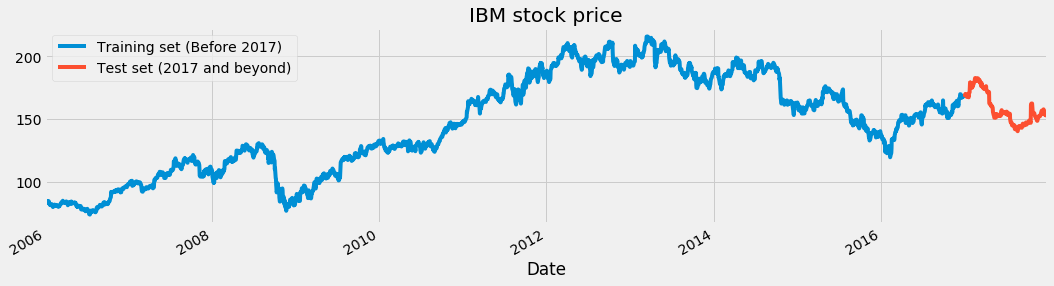

In [6]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [0]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
min(training_set_scaled)

array([0.])

In [9]:
max(training_set_scaled)

array([1.])

In [0]:
a = [0, 1, 2, 3, 4, 5]

In [11]:
a[0:2]

[0, 1]

In [0]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(int(training_set_scaled[i,0] > training_set_scaled[i-1,0]))
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
X_train.shape

(2709, 60)

In [0]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [20]:
X_train.shape

(2709, 60, 1)

In [23]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [24]:
# The LSTM architecture
model = Sequential()
# First LSTM layer with Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
# Second LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# Third LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# Fourth LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))
# The output layer
model.add(Dense(units=1))

# Compiling the RNN
model.compile(optimizer='rmsprop',loss='binary_crossentropy')
# Fitting to the training set
model.fit(X_train,y_train,epochs=50,batch_size=32)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
2709/2709 [==============================] - 19s 7ms/step - loss: 0.8683
Epoch 2/50
2709/2709 [==============================] - 16s 6ms/step - loss: 0.7150
Epoch 3/50
2709/2709 [==============================] - 15s 6ms/step - loss: 0.7049
Epoch 4/50
2709/2709 [==============================] - 15s 6ms/step - loss: 0.7049
Epoch 5/50
2709/2709 [==============================] - 15s 6ms/step - loss: 0.7003
Epoch 6/50
2709/2709 [==============================] - 15s 6ms/step - loss: 0.7012
Epoch 7/50
2709/2709 [==============================] - 15s 5ms/step - loss: 0.6998
Epoch 8/50
2709/2709 [==============================] - 15s 5ms/step - loss: 0.7027
Epoch 9/50
2709/2709 [==============================] - 15s 6ms/step - loss: 0.6998
Epoch 10/50
2709/2709 [======

In [0]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [0]:
# Preparing X_test and predicting the prices
X_test = []
y_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
    y_test.append(int(inputs[i,0] > inputs[i-1,0]))
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
y_predict = model.predict(X_test)

In [0]:
y_predict = np.round(y_predict)

In [0]:
# y_train

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.5179282868525896

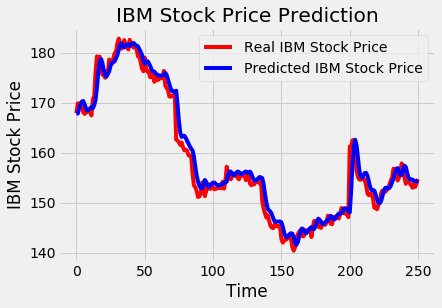

In [0]:
# # Visualizing the results for LSTM
# plot_predictions(test_set,predicted_stock_price)

In [0]:
# # Evaluating our model
# return_rmse(test_set,predicted_stock_price)

The root mean squared error is 2.174125658026595.


# GRU

In [0]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

In [0]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

In [0]:
# Visualizing the results for GRU
plot_predictions(test_set,GRU_predicted_stock_price)

In [0]:
# Evaluating GRU
return_rmse(test_set,GRU_predicted_stock_price)

## Sequence Generation
Here, I will generate a sequence using just initial 60 values instead of using last 60 values for every new prediction. **Due to doubts in various comments about predictions making use of test set values, I have decided to include sequence generation.** The above models make use of test set so it is using last 60 true values for predicting the new value(I will call it a benchmark). This is why the error is so low. Strong models can bring similar results like above models for sequences too but they require more than just data which has previous values. In case of stocks, we need to know the sentiments of the market, the movement of other stocks and a lot more. So, don't expect a remotely accurate plot. The error will be great and the best I can do is generate the trend similar to the test set.

I will use GRU model for predictions. You can try this using LSTMs also. I have modified GRU model above to get the best sequence possible. I have run the model four times and two times I got error of around 8 to 9. The worst case had an error of around 11. Let's see what this iterations.

The GRU model in the previous versions is fine too. Just a little tweaking was required to get good sequences. **The main goal of this kernel is to show how to build RNN models. How you predict data and what kind of data you predict is up to you. I can't give you some 100 lines of code where you put the destination of training and test set and get world-class results. That's something you have to do yourself.**

In [0]:
# Preparing sequence data
initial_sequence = X_train[2708,:]
sequence = []
for i in range(251):
    new_prediction = regressorGRU.predict(initial_sequence.reshape(initial_sequence.shape[1],initial_sequence.shape[0],1))
    initial_sequence = initial_sequence[1:]
    initial_sequence = np.append(initial_sequence,new_prediction,axis=0)
    sequence.append(new_prediction)
sequence = sc.inverse_transform(np.array(sequence).reshape(251,1))

In [0]:
# Visualizing the sequence
plot_predictions(test_set,sequence)

In [0]:
# Evaluating the sequence
return_rmse(test_set,sequence)

So, GRU works better than LSTM in this case. Bidirectional LSTM is also a good way so make the model stronger. But this may vary for different data sets. **Applying both LSTM and GRU together gave even better results.** 

Reference: https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru